This is the file as Will sent it-- leave it as such, and don't modify it!

In [1]:
import gvar as gv
import lsqfit
import h5py
import numpy as np
import itertools
import seaborn as sns
import pandas as pd
from lqcd_analysis import visualize as plt
import scipy
import chipt
from importlib import reload

Patrick writes:

Here’s the data I’m using! The paths are:

* `bare_mat_elems` : Size (n_ops, n_ens, n_boot) = (5, 5, 50). Bootstrapped bare operators for each ensemble
* `renorm_mat_elem` : Size (n_ops, n_ens, n_boot) = (5, 5, 50). Bootstrapped renorm operators for each ensemble
* `mpi` : Size (n_ens, n_boot) = (5, 50). Bootstrapped pion masses for each ensemble (GeV)
* `fpi` : Size (n_ens, n_boot) = (5, 50). Bootstrapped fpi masses for each ensemble
* `ainv` : Size (n_ens, 2) = (5, 2). Mean and standard deviation for the inverse lattice spacing for each ensemble

The ensemble order is [‘24I/ml_0p01’, ‘24I/ml_0p005’, ‘32I/ml0p008’, ‘32I/ml0p006’, ‘32I/ml0p004’], 

The units on all quantities are GeV to the appropriate power

# Read raw data

In [2]:
# h5fname = "/Users/willjay/Research/BetaDecay/chi_extrap_data.h5"
h5fname = "chi_extrap_data_2022-08-01.h5"
keys = ['bare_mat_elems', 'renorm_mat_elems', 'mpi', 'fpi', 'ainv']
data_raw = {}
with h5py.File(h5fname, 'r') as ifile:
    for key in keys:
        data_raw[key] = np.array(ifile[key])

In [3]:
for key, val in data_raw.items():
    print(key, val.shape)

bare_mat_elems (5, 5, 50)
renorm_mat_elems (5, 5, 50)
mpi (5, 50)
fpi (5, 50)
ainv (5, 2)


# Check bootstrap distributions

# Correlate the data

In [4]:
ens_labels = ['24I/ml_0p01', '24I/ml_0p005', '32I/ml0p008', '32I/ml0p006', '32I/ml0p004']

##############################################
# Fully correlated data between Oi, mpi, fpi #
##############################################

data = []
for idx_ens in range(5):
    tmp = {
        'O1': data_raw['renorm_mat_elems'][0, idx_ens, :],
        'O2': data_raw['renorm_mat_elems'][1, idx_ens, :],   
        'O3': data_raw['renorm_mat_elems'][2, idx_ens, :],   
        'O1prime': data_raw['renorm_mat_elems'][3, idx_ens, :],   
        'O2prime': data_raw['renorm_mat_elems'][4, idx_ens, :],   
        'mpi': data_raw['mpi'][idx_ens, :],
        'fpi': data_raw['fpi'][idx_ens, :],
    }
    tmp = gv.dataset.avg_data(tmp, bstrap=True)
    tmp['ainv'] = gv.gvar(*data_raw['ainv'][idx_ens, :])
    tmp['ens_label'] = ens_labels[idx_ens]
#     tmp['mpi'] = gv.dataset.avg_data(data_raw['mpi'][idx_ens, :], bstrap=True)
#     tmp['fpi'] = gv.dataset.avg_data(data_raw['fpi'][idx_ens, :], bstrap=True)
#     tmp2 = {
#         'mpi': data_raw['mpi'][idx_ens, :],
#         'fpi': data_raw['fpi'][idx_ens, :],
#     }
#     tmp2 = gv.dataset.avg_data(tmp2, bstrap=True)
#     tmp['mpi'] = tmp2['mpi']
#     tmp['fpi'] = tmp2['fpi']
    data.append(tmp)
    
data = pd.DataFrame(data)    
data['ns'] = data['ens_label'].apply(lambda astr: int(astr.split('/')[0].rstrip('I')))
display(data)

##################################################
# Partially correlated data between Oi, mpi, fpi #
##################################################

data2 = []
for idx_ens in range(5):
    tmp = {
        'O1': data_raw['renorm_mat_elems'][0, idx_ens, :],
        'O2': data_raw['renorm_mat_elems'][1, idx_ens, :],   
        'O3': data_raw['renorm_mat_elems'][2, idx_ens, :],   
        'O1prime': data_raw['renorm_mat_elems'][3, idx_ens, :],   
        'O2prime': data_raw['renorm_mat_elems'][4, idx_ens, :],   
#         'mpi': data_raw['mpi'][idx_ens, :],
#         'fpi': data_raw['fpi'][idx_ens, :],
    }
    tmp = gv.dataset.avg_data(tmp, bstrap=True)
    tmp['ainv'] = gv.gvar(*data_raw['ainv'][idx_ens, :])
    tmp['ens_label'] = ens_labels[idx_ens]
#     tmp['mpi'] = gv.dataset.avg_data(data_raw['mpi'][idx_ens, :], bstrap=True)
#     tmp['fpi'] = gv.dataset.avg_data(data_raw['fpi'][idx_ens, :], bstrap=True)
    tmp2 = {
        'mpi': data_raw['mpi'][idx_ens, :],
        'fpi': data_raw['fpi'][idx_ens, :],
    }
    tmp2 = gv.dataset.avg_data(tmp2, bstrap=True)
    tmp['mpi'] = tmp2['mpi']
    tmp['fpi'] = tmp2['fpi']
    data2.append(tmp)
    
data2 = pd.DataFrame(data2)    
data2['ns'] = data2['ens_label'].apply(lambda astr: int(astr.split('/')[0].rstrip('I')))
display(data2)






,O1,O1prime,O2,O2prime,O3,ainv,ens_label,fpi,mpi,ns
0,-0.02185(51),-0.0976(14),-0.05371(86),0.01597(28),0.001844(24),1.7840(50),24I/ml_0p01,0.16367(73),0.4309(16),24
1,-0.01838(52),-0.0838(14),-0.04488(89),0.01338(28),0.000936(13),1.7840(50),24I/ml_0p005,0.15161(73),0.3414(13),24
2,-0.02364(82),-0.1002(21),-0.0506(10),0.01436(36),0.001602(29),2.3820(80),32I/ml0p008,0.1620(10),0.4113(26),32
3,-0.02077(73),-0.0892(19),-0.04488(84),0.01277(28),0.001084(19),2.3820(80),32I/ml0p006,0.15428(76),0.3591(17),32
4,-0.01859(82),-0.0808(20),-0.04042(91),0.01153(34),0.000657(12),2.3820(80),32I/ml0p004,0.14763(99),0.3014(18),32


,O1,O1prime,O2,O2prime,O3,ainv,ens_label,fpi,mpi,ns
0,-0.02185(51),-0.0976(14),-0.05371(86),0.01597(28),0.001844(24),1.7840(50),24I/ml_0p01,0.16367(73),0.4309(16),24
1,-0.01838(52),-0.0838(14),-0.04488(89),0.01338(28),0.000936(13),1.7840(50),24I/ml_0p005,0.15161(73),0.3414(13),24
2,-0.02364(82),-0.1002(21),-0.0506(10),0.01436(36),0.001602(29),2.3820(80),32I/ml0p008,0.1620(10),0.4113(26),32
3,-0.02077(73),-0.0892(19),-0.04488(84),0.01277(28),0.001084(19),2.3820(80),32I/ml0p006,0.15428(76),0.3591(17),32
4,-0.01859(82),-0.0808(20),-0.04042(91),0.01153(34),0.000657(12),2.3820(80),32I/ml0p004,0.14763(99),0.3014(18),32


# Check structure of correlation matrix

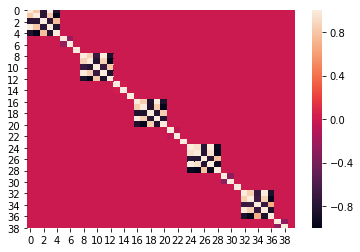

In [5]:
# Check that full 40 x 40 correlation matrix is block diagonal
cols = ['O1', 'O2', 'O3', 'O1prime', 'O2prime', 'mpi', 'fpi', 'ainv']
tmp = []
for _, row in data2.iterrows():
    for col in cols:
        tmp.append(row[col])
sns.heatmap(gv.evalcorr(tmp))

# Plot operators 

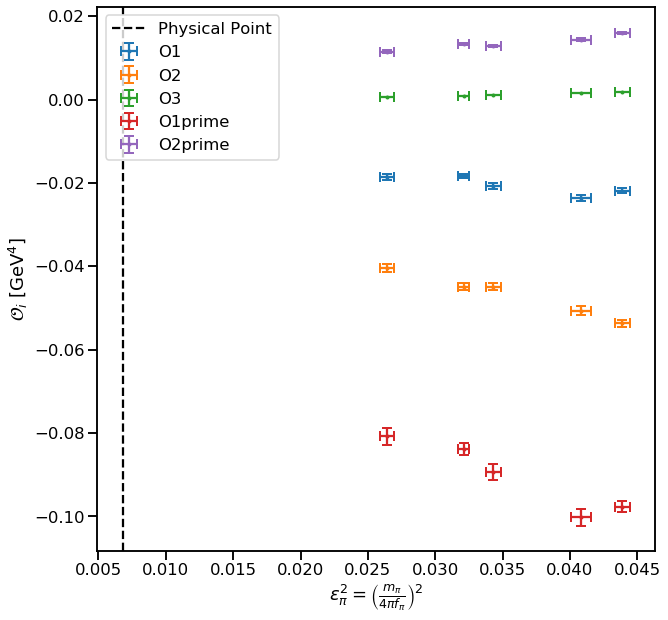

In [6]:
with sns.plotting_context('talk'):
    fig, ax = plt.subplots(1, figsize=(10,10))
    kwargs = {'markeredgewidth':2, 'capsize': 5, 'fmt': '.', 'ms': 4}
    for col in ['O1', 'O2', 'O3', 'O1prime', 'O2prime']:
        y = data[col]
        x = data['mpi'] / (4 * np.pi * data['fpi'])
        x = x**2
        plt.errorbar(ax, x, y, label=col, **kwargs)



    mpi_pdg = 0.1349768 # MeV
    fpi_pdg = 0.1302    # MeV
    ax.axvline(x=(mpi_pdg/(4*np.pi*fpi_pdg))**2, color='k', ls='--', label='Physical Point')
       
    ax.set_xlabel(r"$\epsilon_\pi^2 = \left(\frac{m_\pi}{4\pi f_\pi}\right)^2$")        
    ax.set_ylabel(r"$\mathcal{O}_i$ [GeV$^4$]")
    ax.legend(loc=0)
    

# Wrangle data for fit 

In [7]:
reload(chipt)

<module 'chipt' from '/Users/wijay/Dropbox/Research/BetaDecay/chipt.py'>

########################################
Least Square Fit:
  chi2/dof [dof] = 0.018 [5]    Q = 1    logGBF = 17.889

Parameters:
          mpi 0    0.4311 (15)      [  0.4309 (16) ]  
              1    0.3413 (12)      [  0.3414 (13) ]  
              2    0.4112 (23)      [  0.4113 (26) ]  
              3    0.3589 (12)      [  0.3591 (17) ]  
              4    0.3017 (14)      [  0.3014 (18) ]  
          fpi 0   0.16363 (70)      [ 0.16367 (73) ]  
              1   0.15165 (70)      [ 0.15161 (73) ]  
              2   0.16206 (95)      [  0.1620 (10) ]  
              3   0.15432 (70)      [ 0.15428 (76) ]  
              4   0.14756 (95)      [ 0.14763 (99) ]  
           a2 0    0.3142 (18)      [  0.3142 (18) ]  
              1    0.3142 (18)      [  0.3142 (18) ]  
              2    0.1762 (12)      [  0.1762 (12) ]  
              3    0.1762 (12)      [  0.1762 (12) ]  
              4    0.1762 (12)      [  0.1762 (12) ]  
          alpha     -0.34 (17)      [       0 

/Users/wijay/Dropbox/Research/BetaDecay/chipt.py:98: RuntimeWarning: divide by zero encountered in log
  result = (1 + eps_pi**2 * (np.log(eps_pi**2) - 1 + c))
/Users/wijay/Dropbox/Research/BetaDecay/chipt.py:98: RuntimeWarning: invalid value encountered in multiply
  result = (1 + eps_pi**2 * (np.log(eps_pi**2) - 1 + c))


########################################
Least Square Fit:
  chi2/dof [dof] = 0.036 [5]    Q = 1    logGBF = 15.452

Parameters:
          mpi 0    0.4311 (15)      [  0.4309 (16) ]  
              1    0.3413 (12)      [  0.3414 (13) ]  
              2    0.4113 (24)      [  0.4113 (26) ]  
              3    0.3589 (13)      [  0.3591 (17) ]  
              4    0.3017 (15)      [  0.3014 (18) ]  
          fpi 0   0.16361 (68)      [ 0.16367 (73) ]  
              1   0.15166 (68)      [ 0.15161 (73) ]  
              2   0.16203 (89)      [  0.1620 (10) ]  
              3   0.15438 (63)      [ 0.15428 (76) ]  
              4   0.14749 (86)      [ 0.14763 (99) ]  
           a2 0    0.3142 (18)      [  0.3142 (18) ]  
              1    0.3142 (18)      [  0.3142 (18) ]  
              2    0.1762 (12)      [  0.1762 (12) ]  
              3    0.1762 (12)      [  0.1762 (12) ]  
              4    0.1762 (12)      [  0.1762 (12) ]  
          alpha      0.27 (16)      [       0 

/Users/wijay/Dropbox/Research/BetaDecay/chipt.py:136: RuntimeWarning: divide by zero encountered in log
  result = 1 + eps2 * (3*np.log(eps2) - 1 + c)
/Users/wijay/Dropbox/Research/BetaDecay/chipt.py:136: RuntimeWarning: invalid value encountered in multiply
  result = 1 + eps2 * (3*np.log(eps2) - 1 + c)


########################################
Least Square Fit:
  chi2/dof [dof] = 0.11 [5]    Q = 0.99    logGBF = 12.289

Parameters:
          mpi 0    0.4311 (15)      [  0.4309 (16) ]  
              1    0.3413 (12)      [  0.3414 (13) ]  
              2    0.4112 (24)      [  0.4113 (26) ]  
              3    0.3589 (13)      [  0.3591 (17) ]  
              4    0.3017 (15)      [  0.3014 (18) ]  
          fpi 0   0.16357 (68)      [ 0.16367 (73) ]  
              1   0.15170 (68)      [ 0.15161 (73) ]  
              2   0.16208 (88)      [  0.1620 (10) ]  
              3   0.15437 (64)      [ 0.15428 (76) ]  
              4   0.14746 (87)      [ 0.14763 (99) ]  
           a2 0    0.3142 (18)      [  0.3142 (18) ]  
              1    0.3142 (18)      [  0.3142 (18) ]  
              2    0.1762 (12)      [  0.1762 (12) ]  
              3    0.1762 (12)      [  0.1762 (12) ]  
              4    0.1762 (12)      [  0.1762 (12) ]  
          alpha     -0.09 (14)      [       

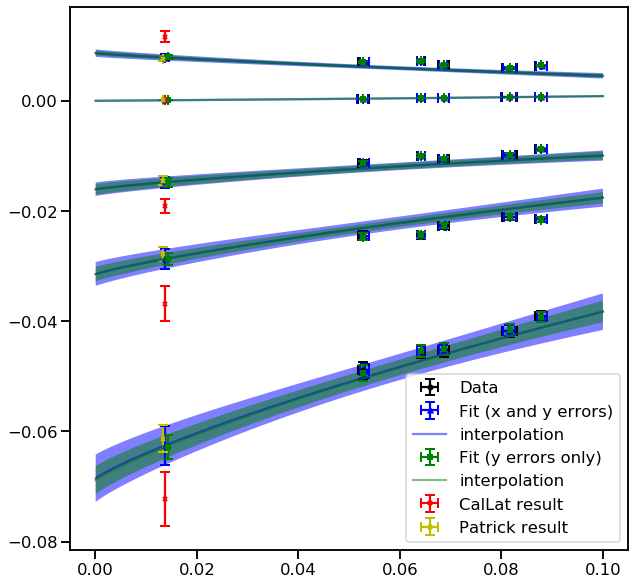

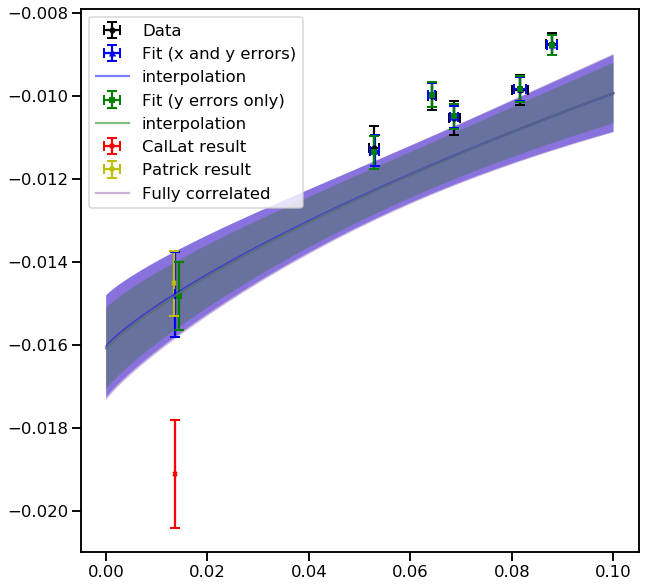

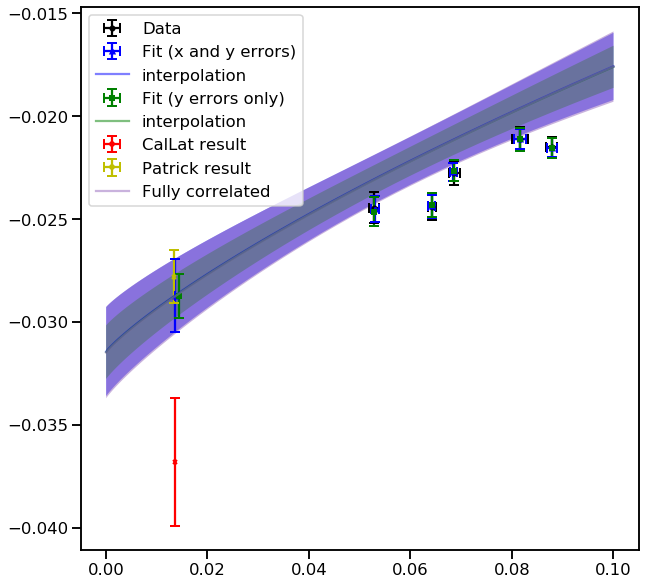

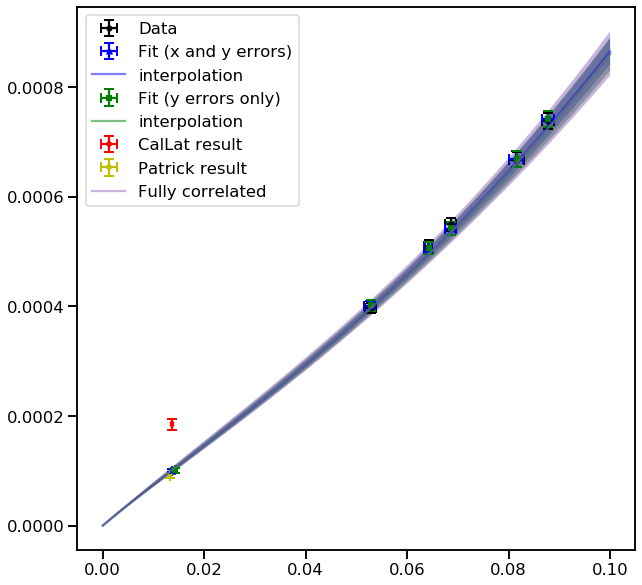

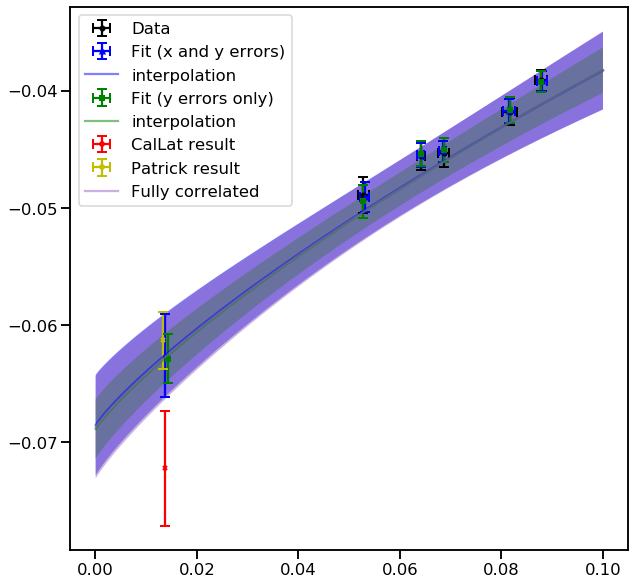

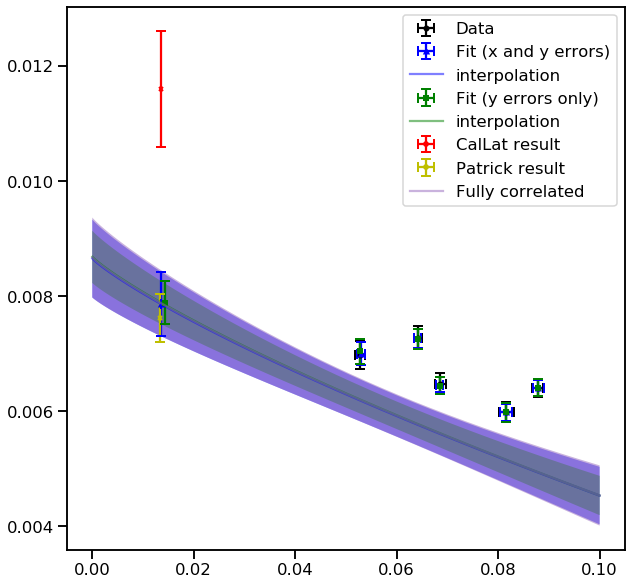

In [8]:
fitter = chipt.ChiralFitter(data)
fitter2 = chipt.ChiralFitter(data2)
results = {}
fits = {}
with sns.plotting_context("talk"):
    fig_all, ax_all = plt.subplots(1, figsize=(10, 10))

    for key in ['O1', 'O2', 'O3', 'O1prime', 'O2prime']:
        fitter(key, prior_width=10.0)
        fitter2(key, prior_width=10.0)
        print("#"*40)
        print(fitter.fit_full)
#         print(fitter2.fit_full)
        print(key, fitter.evaluate_at_physical_point('full'))
        results[key] = fitter.evaluate_at_physical_point('full')
        fits[key] = fitter.fit_full
        
        fig, ax = plt.subplots(1, figsize=(10,10))
        fitter.plot_results(key, ax)
        
        # Interpolation
        if key == 'O3':
            fctm = chipt.F3ctm
        else:
            fctm = chipt.Fctm
        x = {
            'lam_chi': (np.sqrt(2) * 2 * np.pi) * (fitter2._pdg['fpi']),
            'eps_pi': np.linspace(0, np.sqrt(0.1)),
        }
        p = {key: fitter2.fit_full.p[key] for key in ['alpha', 'beta', 'c']}
        y = fctm(x, p)
        plt.errorbar(ax, x['eps_pi']**2, y, color=sns.color_palette()[4],
                     bands=True, alpha=0.5, label='Fully correlated')
        
        
              
        
        fitter.plot_results(key, ax_all)
        ax.legend(loc=0)
        if key == 'O1':
            ax_all.legend(loc=0)


In [9]:
inputs={    
    'data': fitter.fit_full.y,
    'mpi': fitter.fit_full.prior['mpi'],
    'fpi': fitter.fit_full.prior['fpi'],
    'a2':  fitter.fit_full.prior['a2'],
    'alpha': fitter.fit_full.prior['alpha'],
    'beta': fitter.fit_full.prior['beta'],
    'c': fitter.fit_full.prior['c'],        
}
outputs={'O_n:physical': fitter.evaluate_at_physical_point('full')}

    
print(gv.fmt_errorbudget(inputs=inputs, outputs=outputs, verify=True))


inputs={    
    'data': fitter.fit.y,
    'alpha': fitter.fit.prior['alpha'],
    'beta': fitter.fit.prior['beta'],
    'c': fitter.fit.prior['c'],        
}
outputs={'O_n:physical': fitter.evaluate_at_physical_point('basic')}

    
print(gv.fmt_errorbudget(inputs=inputs, outputs=outputs, verify=True))




Partial % Errors:
           O_n:physical
-----------------------
     data:         7.11
      mpi:         7.11
      fpi:         7.11
       a2:         0.22
    alpha:         0.07
     beta:         0.04
        c:         0.31
-----------------------
    total:         7.12

Partial % Errors:
           O_n:physical
-----------------------
     data:         4.74
    alpha:         0.03
     beta:         0.02
        c:         0.14
-----------------------
    total:         4.74



/Users/wijay/anaconda2/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: data and mpi double count errors
  del sys.path[0]
/Users/wijay/anaconda2/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: data and fpi double count errors
  del sys.path[0]
/Users/wijay/anaconda2/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: mpi and fpi double count errors
  del sys.path[0]
/Users/wijay/anaconda2/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: O_n:physical partial error 0.0009681983516375102  !=  total error 0.0005595437345289772
  del sys.path[0]


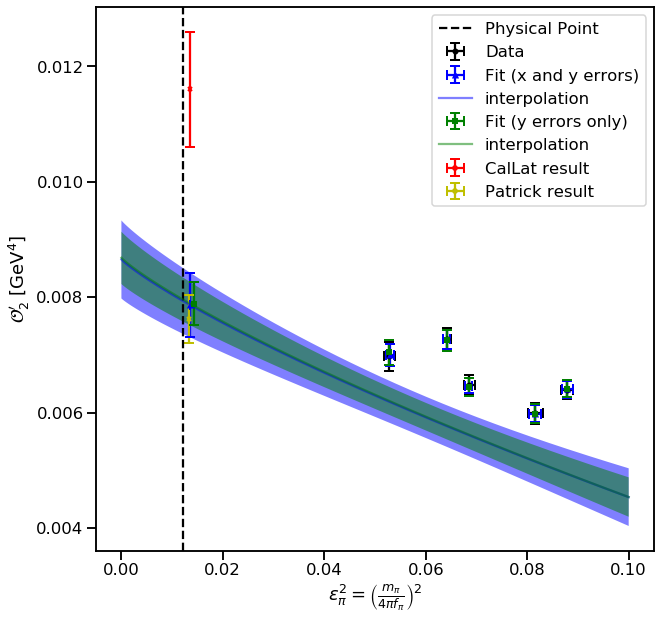

In [10]:
with sns.plotting_context("talk"):
    fig, ax = plt.subplots(1, figsize=(10,10))
    fitter.plot_results(key, ax)
    ax.legend(loc=0)
        
    ax.set_xlabel(r"$\epsilon_\pi^2 = \left(\frac{m_\pi}{4\pi f_\pi}\right)^2$")        
    ax.set_ylabel(r"$\mathcal{O}_2'$ [GeV$^4$]")


    mpi_pdg = 0.1349768 # MeV
    fpi_pdg = 0.1302    # MeV
    ax.axvline(x=(mpi_pdg/(np.sqrt(2)*2*np.pi*fpi_pdg))**2*0.90, color='k', ls='--', label='Physical Point')

    ax.legend(loc=0)
    fig.savefig("Figures/chiral_continuum_o2prime.pdf")
    